# Airline Passenger Satisfaction

Quais fatores levam à satisfação do cliente de uma companhia aérea?

**Contexto**<br>
Este conjunto de dados contém uma pesquisa de satisfação de passageiros de companhias aéreas. Quais fatores estão altamente correlacionados com um passageiro satisfeito (ou insatisfeito)? Você pode prever a satisfação do passageiro?


*Dicionário dos dados*

| Feature | Descrição |
| :--- | :--- |
| *Gender* | Gender of the passengers (Female, Male) |
| *Customer Type* | The customer type (Loyal customer, disloyal customer)|
| *Age* | The actual age of the passengers|
| *Type of Travel* | Purpose of the flight of the passengers (Personal Travel, Business Travel)|
| *Class* | Travel class in the plane of the passengers (Business, Eco, Eco Plus)|
| *Flight distance* |  The flight distance of this journey |
| *Inflight wifi service* | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| *Departure/Arrival time convenient* | Satisfaction level of Departure/Arrival time convenient | 
| *Ease of Online booking* |  Satisfaction level of online booking |
| *Gate location* | Satisfaction level of Gate location |
| *Food and drink* | Satisfaction level of Food and drink |
| *Online boarding* | Satisfaction level of online boarding |
| *Seat comfort* | Satisfaction level of Seat comfort |
| *Inflight entertainment* | Satisfaction level of inflight entertainment |
| *On-board service* | Satisfaction level of On-board service |
| *Leg room service* | Satisfaction level of Leg room service |
| *Baggage handling* | Satisfaction level of baggage handling |
| *Check-in service* | Satisfaction level of Check-in service |
| *Inflight service* | Satisfaction level of inflight service |
| *Cleanliness* | Satisfaction level of Cleanliness |
| *Departure Delay in Minutes* | Minutes delayed when departure |
| *Arrival Delay in Minutes* | Minutes delayed when Arrival |
| *Satisfaction* | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) |### *Dicionário dos dados*
| Feature | Descrição |
| *Gender* | Gender of the passengers (Female, Male) |
| *Customer Type* | The customer type (Loyal customer, disloyal customer)|
| *Age* | The actual age of the passengers|
| *Type of Travel* | Purpose of the flight of the passengers (Personal Travel, Business Travel)|
| *Class* | Travel class in the plane of the passengers (Business, Eco, Eco Plus)|
| *Flight distance* |  The flight distance of this journey |
| *Inflight wifi service* | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| *Departure/Arrival time convenient* | Satisfaction level of Departure/Arrival time convenient | 
| *Ease of Online booking* |  Satisfaction level of online booking |
| *Gate location* | Satisfaction level of Gate location |
| *Food and drink* | Satisfaction level of Food and drink |
| *Online boarding* | Satisfaction level of online boarding |
| *Seat comfort* | Satisfaction level of Seat comfort |
| *Inflight entertainment* | Satisfaction level of inflight entertainment |
| *On-board service* | Satisfaction level of On-board service |
| *Leg room service* | Satisfaction level of Leg room service |
| *Baggage handling* | Satisfaction level of baggage handling |
| *Check-in service* | Satisfaction level of Check-in service |
| *Inflight service* | Satisfaction level of inflight service |
| *Cleanliness* | Satisfaction level of Cleanliness |
| *Departure Delay in Minutes* | Minutes delayed when departure |
| *Arrival Delay in Minutes* | Minutes delayed when Arrival |
| *Satisfaction* | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) |


[Link para o dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

## Pastas e importações
#### Bibliotecas

In [0]:
from pyspark.mllib.stat import Statistics
from pyspark.sql.functions import *
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, Normalizer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Organização dos arquivos

In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables"))

path,name,size,modificationTime
dbfs:/FileStore/tables/Car_details_v3.csv,Car_details_v3.csv,1041637,1681942897000
dbfs:/FileStore/tables/airline_dataset/,airline_dataset/,0,0
dbfs:/FileStore/tables/diabetes_data-1.csv,diabetes_data-1.csv,5287141,1681172068000
dbfs:/FileStore/tables/diabetes_data.csv,diabetes_data.csv,5287141,1681171929000
dbfs:/FileStore/tables/hypertension_data-1.csv,hypertension_data-1.csv,1094634,1681172086000
dbfs:/FileStore/tables/hypertension_data.csv,hypertension_data.csv,1094634,1681171911000
dbfs:/FileStore/tables/parquet/,parquet/,0,0
dbfs:/FileStore/tables/rdd_summary.csv/,rdd_summary.csv/,0,0
dbfs:/FileStore/tables/rdd_summary.txt/,rdd_summary.txt/,0,0
dbfs:/FileStore/tables/rdd_summary_text.txt/,rdd_summary_text.txt/,0,0


dbutils.fs.mkdirs("dbfs:/FileStore/tables/airline_dataset")
dbutils.fs.mv("dbfs:/FileStore/tables/train.csv", "dbfs:/FileStore/tables/airline_dataset")
dbutils.fs.mv("dbfs:/FileStore/tables/test.csv", "dbfs:/FileStore/tables/airline_dataset")

In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/airline_dataset/"))

path,name,size,modificationTime
dbfs:/FileStore/tables/airline_dataset/test.csv,test.csv,3037688,1682255451000
dbfs:/FileStore/tables/airline_dataset/train.csv,train.csv,12193089,1682255451000


#### Tabelas auxiliares

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS AIRLINE_DATA

In [0]:
%sql
CREATE TABLE IF NOT EXISTS AIRLINE_DATA.train
USING csv
OPTIONS (path "/FileStore/tables/airline_dataset/train.csv", header="true");

CREATE TABLE IF NOT EXISTS AIRLINE_DATA.test
USING csv
OPTIONS (path "/FileStore/tables/airline_dataset/test.csv", header="true");

#### Leitura dos dados

In [0]:
path_train = "/FileStore/tables/airline_dataset/train.csv"
path_test = "/FileStore/tables/airline_dataset/test.csv"

In [0]:
files = [path_train, path_test]
df_names = ['df_train', 'df_test']

for i,path in enumerate(files):
    globals()[df_names[i]]= spark.read.format("csv") \
        .option('header', 'true') \
        .option('sep', ',') \
        .option('inferSchema', 'true') \
        .load(path)

In [0]:
display(df_train.head())

Row(age=13, flight_distance=460, inflight_wifi_service=3, departure/arrival_time_convenient=4, ease_of_online_booking=3, gate_location=1, food_and_drink=5, online_boarding=3, seat_comfort=5, inflight_entertainment=5, on-board_service=4, leg_room_service=3, baggage_handling=4, checkin_service=4, inflight_service=5, cleanliness=5, departure_delay_in_minutes=25, arrival_delay_in_minutes=18.0, gender=1.0, customer_type=0.0, type_of_travel=1.0, class=2.0, satisfaction=0.0)

In [0]:
df_train.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

In [0]:
print(f'Quantidade de linhas: {df_train.count()}')
print(f'Quantidade de colunas: {len(df_train.columns)}')

Quantidade de linhas: 103904
Quantidade de colunas: 25


## Limpeza dos dados

In [0]:
df_train = df_train.drop('_c0', 'id')
df_test = df_test.drop('_c0', 'id')

### Verificação de valores faltantes

#### Train

In [0]:
missing_values = df_train.agg(*[
    sum(when((col(c).isNull()) | (isnan(col(c))), 1).otherwise(0)).alias(c) for c in df_train.columns
]).toPandas().T.rename(columns={0: 'missing_values'})

missing_values

,missing_values
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


#### Test

In [0]:
missing_values = df_test.agg(*[
    sum(when((col(c).isNull()) | (isnan(col(c))), 1).otherwise(0)).alias(c) for c in df_test.columns
]).toPandas().T.rename(columns={0: 'missing_values'})

missing_values

,missing_values
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


#### Substituição de valores faltantes

In [0]:
mean_value = df_train.select(mean(col("Arrival Delay in Minutes"))).collect()[0][0]
df_train = df_train.fillna(mean_value, subset=["Arrival Delay in Minutes"])

mean_value = df_test.select(mean(col("Arrival Delay in Minutes"))).collect()[0][0]
df_test = df_test.fillna(mean_value, subset=["Arrival Delay in Minutes"])

### Verificando dados duplicados

Não há dados duplicados:

In [0]:
print("Treino")
print(f' Quantidade total de dados: {df_train.count()}')
print(f' Quantidade de dados distintos: {df_train.distinct().count()}')

print("Teste")
print(f' Quantidade total de dados: {df_test.count()}')
print(f' Quantidade de dados distintos: {df_test.distinct().count()}')

Treino
 Quantidade total de dados: 103904
 Quantidade de dados distintos: 103904
Teste
 Quantidade total de dados: 25976
 Quantidade de dados distintos: 25976


### Padronizando nomes das variáveis

In [0]:
lista = [col.lower().replace(' ', '_') for col in df_train.columns]

df_train = df_train.toDF(*lista)
df_test = df_test.toDF(*lista)

## EDA

### Algumas proporções

In [0]:
%sql
SELECT Class, COUNT(Class)
FROM airline_data.train
GROUP BY Class

Class,count(Class)
Eco Plus,7494
Business,49665
Eco,46745


In [0]:
%sql
SELECT `Type of Travel`, COUNT(`Type of Travel`), CONCAT(ROUND((COUNT(`Type of Travel`) / (SELECT COUNT(*) FROM airline_data.train)) * 100, 2), '%') AS Porcentagem
FROM airline_data.train
GROUP BY `Type of Travel`

Type of Travel,count(Type of Travel),Porcentagem
Personal Travel,32249,31.04%
Business travel,71655,68.96%


##### Balanceamento

In [0]:
%sql
SELECT Satisfaction, COUNT(Satisfaction), CONCAT(ROUND((COUNT(`Type of Travel`) / (SELECT COUNT(*) FROM airline_data.train)) * 100, 2), '%') AS Porcentagem
FROM airline_data.train
GROUP BY Satisfaction

Satisfaction,count(Satisfaction),Porcentagem
neutral or dissatisfied,58879,56.67%
satisfied,45025,43.33%


In [0]:
%sql
SELECT Satisfaction, COUNT(Satisfaction), CONCAT(ROUND((COUNT(`Type of Travel`) / (SELECT COUNT(*) FROM airline_data.test)) * 100, 2), '%') AS Porcentagem
FROM airline_data.test
GROUP BY Satisfaction

Satisfaction,count(Satisfaction),Porcentagem
neutral or dissatisfied,14573,56.1%
satisfied,11403,43.9%


### Estatística descritiva

In [0]:
df_train.toPandas().describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Transformando variáveis categóricas string em numéricas

In [0]:
# Separar colunas categoricas e numericas
num_cols = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# O restante será categorico
cat_cols = [col for col in df_train.columns if col not in num_cols]

# Transformar variaveis categoricas string em numericas
def idx_categories(df, column_name):
    idx = StringIndexer(inputCol=column_name, outputCol=column_name+'Num')
    df_idx = idx.fit(df).transform(df)
    return df_idx

to_idx_list = ["gender", "customer_type", "type_of_travel", "class", "satisfaction"]

for col in to_idx_list:
    for i in range(len(df_names)):
        globals()[df_names[i]] = idx_categories(globals()[df_names[i]], col)
        globals()[df_names[i]] = globals()[df_names[i]].drop(col)
        globals()[df_names[i]] =  globals()[df_names[i]].withColumnRenamed(col+'Num', col)
        
#display(df_train)

### Correlação entre variáveis

#### Variáveis categóricas x target categórico (X2-test)

http://www.sefidian.com/2020/08/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/

In [0]:
# Para utilizar a função ChiSquaredTest, deve-se dividir em feature e target. As features devem ser reunidas em uma coluna:
assembler = VectorAssembler(
        inputCols = cat_cols[:-1],   # todas menos o target "satisfaction"
         outputCol = "features"
)

chi2_table = assembler.transform(df_train).select('features', 'satisfaction')
chiSqResult = ChiSquareTest.test(chi2_table, 'features', 'satisfaction')
display(chiSqResult)

pValues,degreesOfFreedom,statistics
"Map(vectorType -> dense, length -> 18, values -> List(8.278205965517316E-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))","List(1, 1, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5)","Map(vectorType -> dense, length -> 18, values -> List(15.493668870573625, 3658.260694673255, 20947.192277056274, 26471.862944492277, 28696.409226996497, 451.0626367029049, 10407.60604197969, 2493.443647341715, 5203.235820229115, 39750.99560405667, 15756.13007874631, 18508.067997546692, 11508.560623692005, 12271.36922668582, 8610.542475361995, 6422.322951978192, 8283.073106744925, 10245.159945995041))"


In [0]:
#display(df_train.sample(0.01))

#### Variáveis numéricas x target categórico (ANOVA)

In [0]:
print(num_cols)

['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']


In [0]:
from scipy.stats import f_oneway
 
CategoryGroupLists = df_train.toPandas().groupby('satisfaction')['arrival_delay_in_minutes'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
# H0: the variables are NOT correlated
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova in age is: ', AnovaResults[1])

P-Value for Anova in age is:  8.35053210424591e-77


##### Conferindo a relação entre as variáveis numéricas com o target

In [0]:
df_categorized = df_train.withColumn('satisfaction', df_train['satisfaction'].cast('int'))

df_categorized = df_train.select('*', 
                when(df_train.age <= 12, '0-12 anos') \
                .when((df_train.age > 12) & (df_train.age <= 20), '12-20 anos') \
                .when((df_train.age > 20) & (df_train.age <= 30), '21-30 anos') \
                .when((df_train.age > 30) & (df_train.age <= 40), '31-40 anos') \
                .when((df_train.age > 40) & (df_train.age <= 50), '41-50 anos') \
                .when((df_train.age > 50) & (df_train.age <= 60), '51-60 anos') \
                .when((df_train.age > 60), '60+ anos') \
                .alias('age_range')
               )

df_categorized = df_categorized.select('*', 
                when(df_train.flight_distance <= 500, '< 500 km') \
                .when((df_train.flight_distance > 500) & (df_train.flight_distance <= 1000), '500-1000 km') \
                .when((df_train.flight_distance > 1000) & (df_train.flight_distance <= 2000), '1000-2000 km') \
                .when((df_train.flight_distance > 2000) & (df_train.flight_distance <= 3000), '2000-3000 km') \
                .when((df_train.flight_distance > 3000), '> 3000 km') \
                .alias('dist_range')
               )

df_categorized = df_categorized.select('*', 
                when(df_train.departure_delay_in_minutes <= 5, '< 5 min late') \
                .when((df_train.departure_delay_in_minutes > 5) & (df_train.departure_delay_in_minutes <= 15), '5-15 min late') 
                .when((df_train.departure_delay_in_minutes > 15) & (df_train.departure_delay_in_minutes <= 30), '15-30 min late') 
                .when((df_train.departure_delay_in_minutes> 30), '> 30 min late') \
                .alias('delay_range')
               )

#display(df_categorized.sample(0.01))


#### Correlação entre variáveis numéricas
- Método de pearson

In [0]:
def compute_correlation_matrix(df, method='pearson'):
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df

In [0]:
df_train = df_train.withColumn('arrival_delay_in_minutes', df_train['arrival_delay_in_minutes'].cast('int'))
df_test = df_test.withColumn('arrival_delay_in_minutes', df_test['arrival_delay_in_minutes'].cast('int'))

df_correlation =  compute_correlation_matrix(df_train.select(num_cols))

display(df_correlation)

age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
1.0,0.09946084164551809,-0.01015223015422087,-0.012127022298130724
0.09946084164551809,1.0,0.002158011461567632,-0.002423123530897586
-0.01015223015422087,0.002158011461567632,1.0,0.9611525762994211
-0.012127022298130724,-0.002423123530897586,0.9611525762994211,1.0


##### Heat Map

há uma forte correlação entre as features **Departure Delay in Minutes** e **Arrival Delay in Minutes**. Portanto, uma delas será retirada para não enviesar o treinamento.

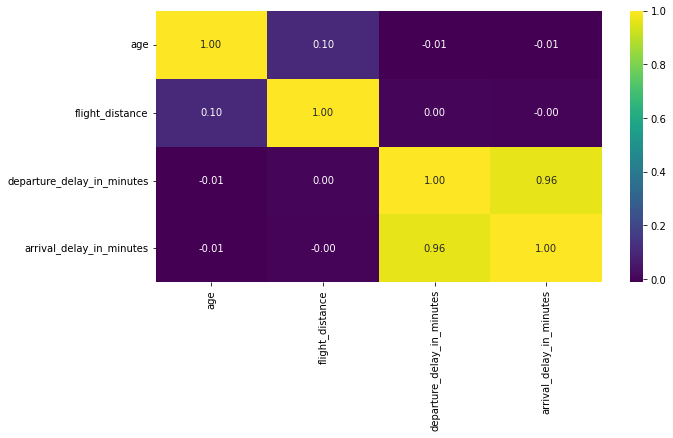

In [0]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_correlation, annot=True, fmt=".2f",  cmap="viridis"); 

##### Correlação
Correlação entre as features **Departure Delay in Minutes** e **Arrival Delay in Minutes** em um gráfico de dispersão

In [0]:
display(df_train)

age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender,customer_type,type_of_travel,class,satisfaction
13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,1.0,0.0,1.0,2.0,0.0
25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,1.0,1.0,0.0,0.0,0.0
26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0.0,0.0,0.0,0.0,1.0
25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0.0,0.0,0.0,0.0,0.0
61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1.0,0.0,0.0,0.0,1.0
26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0,0.0,0.0,1.0,1.0,0.0
47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23,1.0,0.0,1.0,1.0,0.0
52,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0,0.0,0.0,0.0,0.0,1.0
41,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0,0.0,0.0,0.0,0.0,0.0
20,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0,1.0,1.0,0.0,1.0,0.0


Output can only be rendered in Databricks

In [0]:
# Remover o arrival delay devido a grande quantidade de dados do tipo null

df_train = df_train.drop('arrival_delay_in_minutes')
df_test = df_test.drop('arrival_delay_in_minutes')

## Visualizações

### Histogramas

In [0]:
display(df_train.sample(0.01))

age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,gender,customer_type,type_of_travel,class,satisfaction
27,1080,3,3,3,3,3,3,3,3,4,1,3,3,3,3,0,0.0,1.0,0.0,2.0,0.0
57,1389,1,1,3,1,5,5,4,5,5,5,5,4,5,5,0,1.0,0.0,0.0,0.0,1.0
17,991,2,3,3,4,5,3,5,5,3,5,3,2,3,5,0,1.0,0.0,1.0,1.0,0.0
47,247,1,1,1,1,4,1,4,4,4,2,2,2,2,4,0,0.0,1.0,0.0,1.0,0.0
26,3434,0,4,0,5,1,1,1,1,4,2,4,4,2,1,0,1.0,0.0,0.0,0.0,1.0
40,991,4,2,2,2,4,2,2,4,4,3,4,1,4,2,22,1.0,0.0,0.0,0.0,0.0
29,546,0,2,0,4,5,0,5,5,3,2,4,4,4,5,0,1.0,0.0,1.0,1.0,1.0
47,2432,2,2,2,2,2,4,3,2,2,2,2,3,2,4,0,1.0,0.0,0.0,0.0,0.0
44,1416,1,1,1,1,5,1,3,4,4,4,4,5,4,3,0,0.0,0.0,0.0,0.0,1.0
30,2239,3,4,4,2,4,4,4,4,3,3,4,4,5,4,0,1.0,0.0,1.0,0.0,0.0


Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

## Modelos de classificação
<br>


* Regressão Logística
* Random Forest

### Pré-processamento

#### One-hot-encoding

One-hot apenas para as variáveis categóricas não-ordinais, ou seja, que não possuem ordem de relevância.

In [0]:
df_names = ['df_train', 'df_test']
enc_cols = ['customer_type', 'type_of_travel', 'class']

for name in df_names:
    for col in enc_cols:
        encoder = OneHotEncoder(inputCol=col, outputCol=col+'Vec')
        globals()[name] = encoder.fit(globals()[name]).transform(globals()[name])
    
#display(df_train)

#### Normalização

Normalizar apenas variáveis numéricas. Normalizando coluna a coluna manualmente:

In [0]:
num_cols = ['age', 'flight_distance', 'departure_delay_in_minutes']
df_names = ['df_train', 'df_test']

for name in df_names:
    for col in num_cols: 
        mean = globals()[name].select(avg(col)).first().__getitem__('avg(' +col+ ')')
        std = globals()[name].select(stddev(col)).first().__getitem__('stddev_samp(' +col+ ')')

        globals()[name] = globals()[name].withColumn(col, (globals()[name][col] - mean) / std)
        
#display(df_train)

#### Seleção de variáveis

Tentamos fazer uma seleção de variáveis para verificar se melhoraria o resultado:

In [0]:
from pyspark.ml.feature import UnivariateFeatureSelector

num_cols = ['age', 'flight_distance', 'departure_delay_in_minutes']
cat_cols = [col for col in df_train.columns if col not in num_cols]

# Cria um Dense Vector pra variavel numericas e categoricas
num_assembler = VectorAssembler(inputCols=num_cols, outputCol='numericVec')
cat_assembler = VectorAssembler(inputCols=cat_cols, outputCol='categoricalVec')
df_train_sel = num_assembler.transform(df_train)
df_train_sel = cat_assembler.transform(df_train_sel )

# Seletor numérico
selector_num = UnivariateFeatureSelector(featuresCol='numericVec', outputCol="selectedNumericFeatures",
                                     labelCol="satisfaction", selectionMode="numTopFeatures")
selector_num.setFeatureType("continuous").setLabelType("categorical").setSelectionThreshold(1)

# Seletor categórico
selector_cat = UnivariateFeatureSelector(featuresCol='categoricalVec', outputCol="selectedCatFeatures",
                                     labelCol="satisfaction", selectionMode="numTopFeatures")
selector_cat.setFeatureType("categorical").setLabelType("categorical").setSelectionThreshold(10)

# Resultados
result = selector_num.fit(df_train_sel).transform(df_train_sel)
result = selector_cat.fit(result).transform(result)

#display(result.select('numericVec', 'categoricalVec', 'selectedNumericFeatures', 'selectedCatFeatures'))

In [0]:
print("Features numéricas selecionadas: ")
print(result.schema["selectedNumericFeatures"].metadata["ml_attr"]["attrs"])
print("\nFeatures categóricas selecionadas: ")
print(result.schema["selectedCatFeatures"].metadata["ml_attr"]["attrs"])

Features numéricas selecionadas: 
{'numeric': [{'idx': 0, 'name': 'age'}]}

Features categóricas selecionadas: 
{'numeric': [{'idx': 0, 'name': 'inflight_wifi_service'}, {'idx': 1, 'name': 'departure/arrival_time_convenient'}, {'idx': 2, 'name': 'ease_of_online_booking'}, {'idx': 3, 'name': 'gate_location'}, {'idx': 4, 'name': 'food_and_drink'}, {'idx': 5, 'name': 'online_boarding'}, {'idx': 6, 'name': 'seat_comfort'}, {'idx': 7, 'name': 'inflight_entertainment'}, {'idx': 8, 'name': 'on-board_service'}, {'idx': 9, 'name': 'leg_room_service'}]}


Porém, vimos que a melhor opção é incluir todas as features, pois todas são de alguma forma correlacionadas com o target, como vimos anteriormente com os testes de correlação.

In [0]:
assembler = VectorAssembler(
        inputCols=['age', 'flight_distance', 'inflight_wifi_service', 'departure/arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service',
                     'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'gender', 'customer_typeVec', 'type_of_travelVec', 'classVec'],
        outputCol="features")
 
df_final_train = assembler.transform(df_train)
df_final_test = assembler.transform(df_test)
 
#display(df_final_train)

### Regressão Logística

#### Treino

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression(featuresCol='features', 
                        labelCol='satisfaction')

paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0, 0.1]) \
    .addGrid(lr.elasticNetParam, [0, 0.5, 1]) \
    .addGrid(lr.maxIter, [10, 15]) \
    .build()

evaluator = MulticlassClassificationEvaluator(labelCol="satisfaction", predictionCol="prediction", metricName='f1')

cv = CrossValidator(estimator=lr, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, 
                    numFolds=3)

cv_lr = cv.fit(df_final_train)

In [0]:
print(f'Best model RegParam = {cv_lr.bestModel._java_obj.getRegParam()}')
print(f'Best model ElasticNetParam = {cv_lr.bestModel._java_obj.getElasticNetParam()}')
print(f'Best model MaxIter = {cv_lr.bestModel._java_obj.getMaxIter()}')

Best model RegParam = 0.0
Best model ElasticNetParam = 0.0
Best model MaxIter = 10


#### Predição

In [0]:
predictions = cv_lr.bestModel.transform(df_final_test)

#### Avaliação
* Accuracy
* Precision
* Recall
* F1

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="satisfaction", predictionCol="prediction")
 
metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]
 
for metric in metrics:
    metric_value = evaluator.setMetricName(metric).evaluate(predictions)
    print("{}: {:.4f}".format(metric, metric_value))

accuracy: 0.8717
weightedPrecision: 0.8716
weightedRecall: 0.8717
f1: 0.8714


In [0]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = predictions.select('satisfaction', 'prediction').toPandas()
M = confusion_matrix(results.satisfaction, results.prediction)
display(M)

array([[13144,  1429],
       [ 1904,  9499]])

### Random Forest

#### Treino

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel

rf = RandomForestClassifier(featuresCol='features', 
                        labelCol='satisfaction')

paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [10]) \
    .addGrid(rf.numTrees, [50]) \
    .build()

evaluator = MulticlassClassificationEvaluator(labelCol="satisfaction", predictionCol="prediction", metricName='f1')

cv = CrossValidator(estimator=rf, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, 
                    numFolds=3)

cv_rf = cv.fit(df_final_train)


In [0]:
print(f'Best model num trees = {cv_rf.bestModel._java_obj.getNumTrees()}')
print(f'Best model max depth = {cv_rf.bestModel._java_obj.getMaxDepth()}')

Best model num trees = 50
Best model max depth = 10


#### Predição

In [0]:
predictions = cv_rf.bestModel.transform(df_final_test)

#### Avaliação

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="satisfaction", predictionCol="prediction")
 
metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]
 
for metric in metrics:
    metric_value = evaluator.setMetricName(metric).evaluate(predictions)
    print("{}: {:.4f}".format(metric, metric_value))

accuracy: 0.9462
weightedPrecision: 0.9462
weightedRecall: 0.9462
f1: 0.9462


In [0]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = predictions.select('satisfaction', 'prediction').toPandas()
M = confusion_matrix(results.satisfaction, results.prediction)
display(M)

array([[13929,   644],
       [  753, 10650]])